# Table of content:
01. Importing the Data and Libraries
02. Create an appropriate visualization to show the distribution of profiles.
03. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.
04. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

# 1. Importing the Data and Libraries

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# Import Data
path = r'/Users/azadeh/Documents/Instacart Basket Analysis'

In [5]:
# Import customer_profiles
df =  pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data','customer_profiles.pkl'))

# 2. Create an appropriate visualization to show the distribution of profiles.

In [4]:
# Removing the limit to the amount of columns displayed by default: 
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,Unnamed: 0_x,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days since the last order,product_id,add_to_cart_order,reordered,Unnamed: 0_y,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_days_order,order_frequency_flag,gender,state,age,date_joined,dependent_count,fam_status,income,region,exclusion_flag,age_group,income_group,family_charac,department
0,0,2539329,1,1,2,8,NaN,196,1,0,195,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,Young adult (18-33),Low income,Parent,beverages
1,1,2398795,1,2,3,7,15.0,196,1,1,195,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,Young adult (18-33),Low income,Parent,beverages
2,2,473747,1,3,3,12,21.0,196,1,1,195,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,Young adult (18-33),Low income,Parent,beverages
3,3,2254736,1,4,4,7,29.0,196,1,1,195,Soda,77,7,9.0,both,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,Young adult (18-33),Low income,Parent,beverages
4,4,431534,1,5,4,15,28.0,196,1,1,195,Soda,77,7,9.0,both,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent,Female,Alabama,31,2/17/2019,3,married,40423,South,active customer,Young adult (18-33),Low income,Parent,beverages


In [6]:
df.columns

Index(['Unnamed: 0_x', 'order_id', 'user_id', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days since the last order',
       'product_id', 'add_to_cart_order', 'reordered', 'Unnamed: 0_y',
       'product_name', 'aisle_id', 'department_id', 'prices', '_merge',
       'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spending_flag', 'median_days_order', 'order_frequency_flag', 'gender',
       'state', 'age', 'date_joined', 'dependent_count', 'fam_status',
       'income', 'region', 'exclusion_flag', 'age_group', 'income_group',
       'family_charac', 'department'],
      dtype='object')

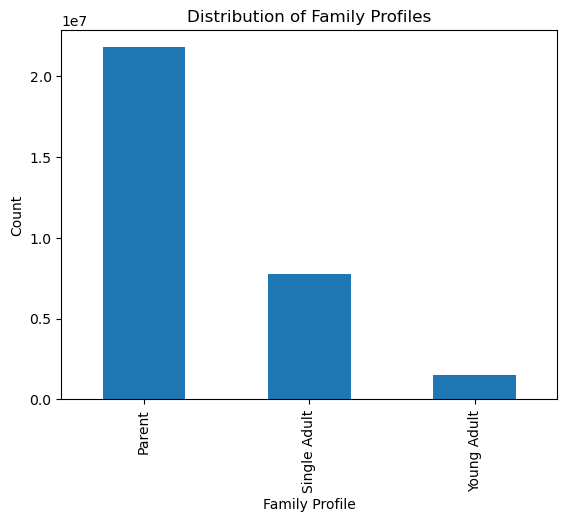

In [7]:
#Distribution of Family Profile 
family_characteristic_distribution_bar = df['family_charac'].value_counts().plot.bar()
plt.title('Distribution of Family Profiles')
plt.xlabel('Family Profile')
plt.ylabel('Count')
plt.show()

In [8]:
# Exporting the bar outside Jupyter through figure.savefig() - family_characteristic_distribution_bar
family_characteristic_distribution_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_profile_distribution_bar.png'))

In [9]:
# family_profile in different regions 
fam_region_profile = pd.crosstab(df['family_charac'],df['region'], dropna = False)

In [10]:
fam_region_profile

region,Midwest,Northeast,South,West
family_charac,,,,
Parent,5087262,3853773,7223749,5578927
Single Adult,1822816,1354482,2581933,1980450
Young Adult,351435,256430,505457,367850


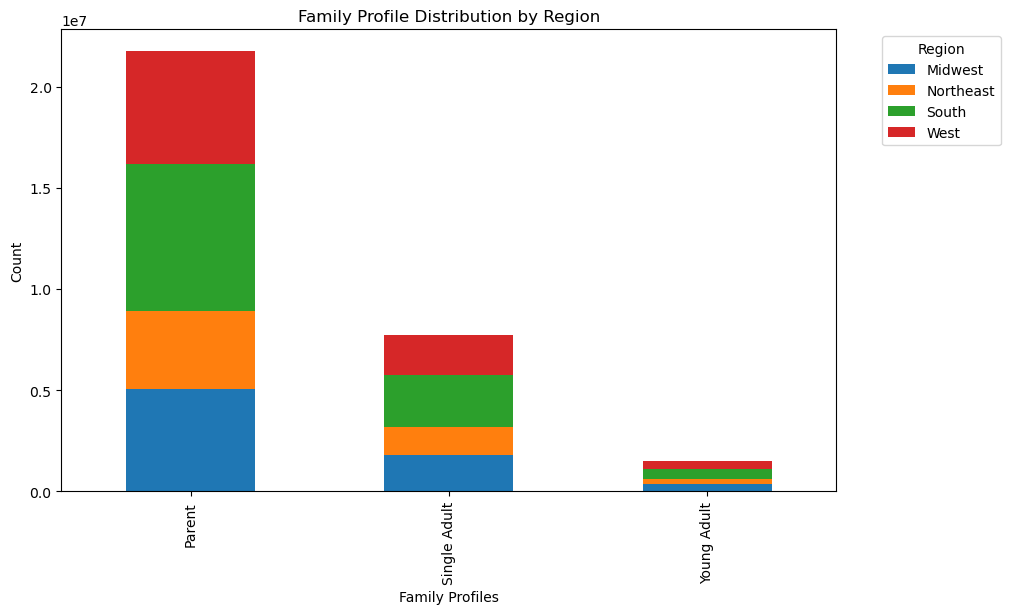

In [11]:
fam_region_profile_bar_stacked = fam_region_profile.plot.bar(stacked=True, figsize=(10, 6))

plt.title('Family Profile Distribution by Region')
plt.xlabel('Family Profiles')
plt.ylabel('Count')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

In [12]:
# Exporting the bar outside Jupyter through figure.savefig() 
fam_region_profile_bar_stacked.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_region_bar.png'))

In [13]:
# Comparing family_profile in different departments - crosstab created 
fam_departments_profile = pd.crosstab(df['department'],df['family_charac'], dropna = False)

In [14]:
fam_departments_profile

family_charac,Parent,Single Adult,Young Adult
department,,,
alcohol,99421,36827,8379
babies,287683,103328,19381
bakery,785749,281395,53684
beverages,1807453,645341,119107
breakfast,471220,166432,33198
bulk,23818,8000,1633
canned goods,712577,251020,48477
dairy eggs,3632599,1294376,250207
deli,702333,253382,48119


<Figure size 1000x1200 with 0 Axes>

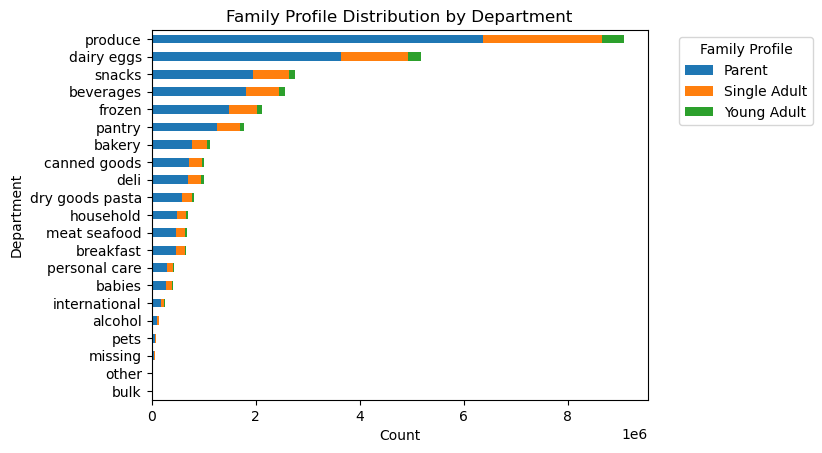

In [15]:
# Creating bar for family_profile in different departments 
plt.figure(figsize=(10, 12))  
fam_departments_profile.sort_values(by='Parent', ascending=True).plot.barh(stacked=True)
plt.title('Family Profile Distribution by Department')
plt.xlabel('Count')
plt.ylabel('Department')
plt.legend(title='Family Profile', bbox_to_anchor=(1.05, 1), loc='upper left')

# Export the figure
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'fam_departments_profile_bar.png'))

# Show the plot
plt.show()

# 3. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [16]:
# Comparing income_group by aggregating the max, mean, and min and order_id
income_group_distribution_agg = df.groupby('income_group').agg({'order_id': 'count','prices': ['min', 'mean', 'max']})

In [17]:
income_group_distribution_agg

order_id prices                    
                  count    min       mean      max
income_group                                      
High income     7753117    1.0  21.959259  99999.0
Low income      7661478    1.0   7.301387  14900.0
Medium income  15549969    1.0   9.217006  99999.0

Text(0, 0.5, 'Count')

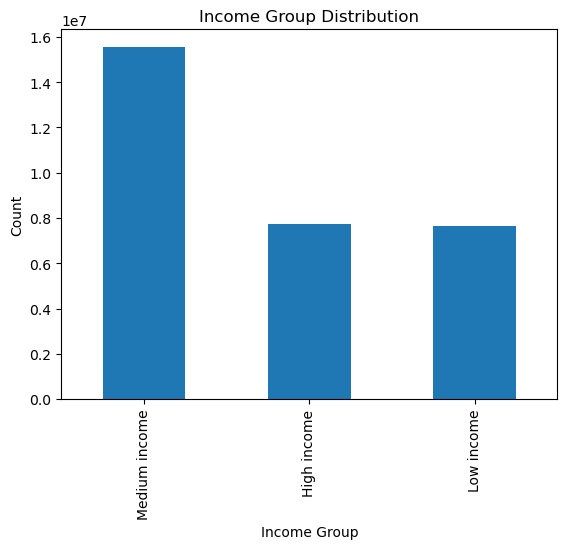

In [18]:
#Creating the bar
income_group_distribution_bar = df['income_group'].value_counts().plot.bar()
plt.title('Income Group Distribution')
plt.xlabel('Income Group')
plt.ylabel('Count')

In [19]:
#Export income_group_distribution
income_group_distribution_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_group_distribution.png'))

# 4. Compare your customer profiles with regions and departments.

In [20]:
# Comparing income_group in different regions - crosstab created 
income_group_region = pd.crosstab(df['income_group'],df['region'], dropna = False)

In [21]:
income_group_region

region,Midwest,Northeast,South,West
income_group,,,,
High income,1843891,1374109,2553484,1981633
Low income,1770874,1354113,2567492,1968999
Medium income,3646748,2736463,5190163,3976595


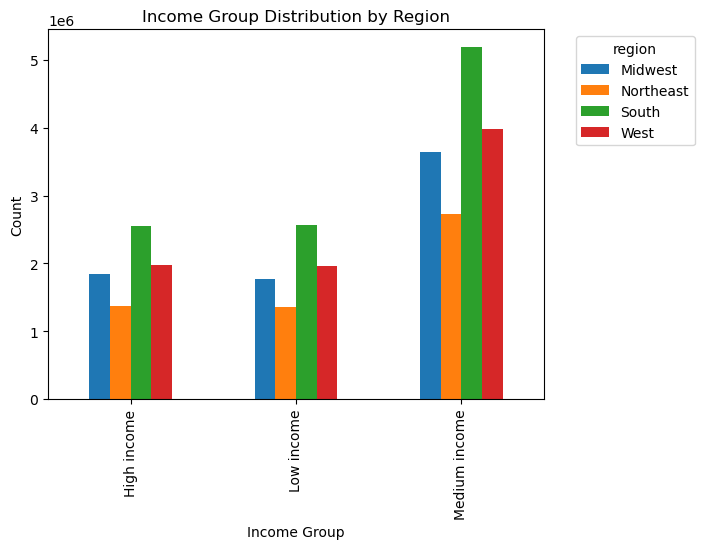

In [22]:
#Create the bar for Income Group Distribution in Regions
income_group_region_bar = income_group_region.plot(kind='bar')
# Adding labels and title
plt.title('Income Group Distribution by Region')
plt.xlabel('Income Group')
plt.ylabel('Count')
plt.legend(title='region', bbox_to_anchor=(1.05, 1), loc='upper left')

In [23]:
#Export Income Group Distribution by Region
income_group_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_group_region_bar.png'))

In [24]:
# Comparing Income Group Distribution by Department
income_group_department = pd.crosstab(df['department'],df['income_group'], dropna = False) 

In [25]:
income_group_department

income_group,High income,Low income,Medium income
department,,,
alcohol,41099,36650,66878
babies,105771,82803,221818
bakery,290807,261763,568258
beverages,619356,737043,1215502
breakfast,163094,185892,321864
bulk,7550,9320,16581
canned goods,266276,219841,525957
dairy eggs,1316016,1215904,2645262
deli,251347,245437,507050


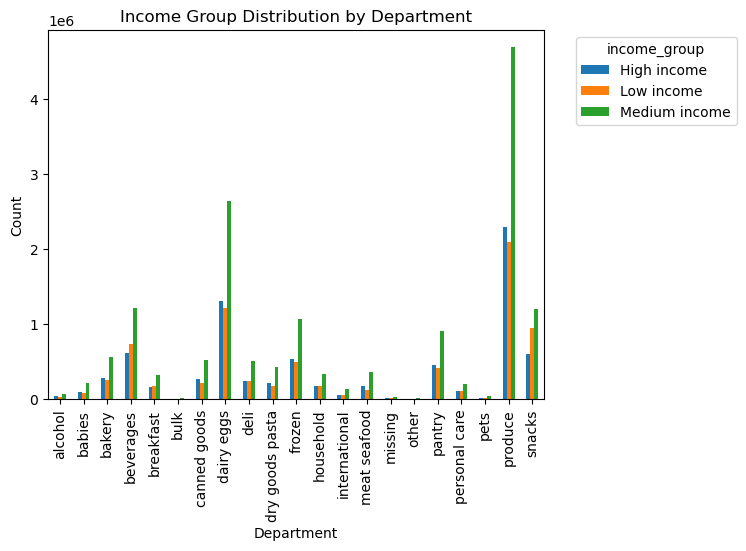

In [26]:
#creating bar for income_group_department
income_group_department_bar = income_group_department.plot(kind='bar')

# Adding labels and title
plt.title('Income Group Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='income_group', bbox_to_anchor=(1.05, 1), loc='upper left')
# Export the figure
income_group_department_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_group_department_bar.png'))
# Show the plot
plt.show()


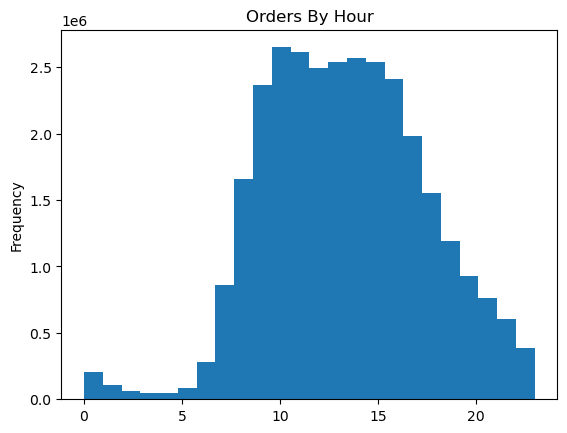

In [27]:
hist_order_hour_of_day = df['order_hour_of_day'].plot.hist(bins = 24, title = 'Orders By Hour')

In [28]:
df['order_hour_of_day'].value_counts().sort_index()

order_hour_of_day
0      208042
1      109621
2       65691
3       48796
4       50763
5       84418
6      281013
7      863213
8     1659110
9     2363611
10    2649744
11    2614880
12    2495795
13    2539276
14    2567903
15    2535966
16    2413681
17    1982345
18    1551184
19    1193878
20     930909
21     763111
22     607060
23     384554
Name: count, dtype: int64

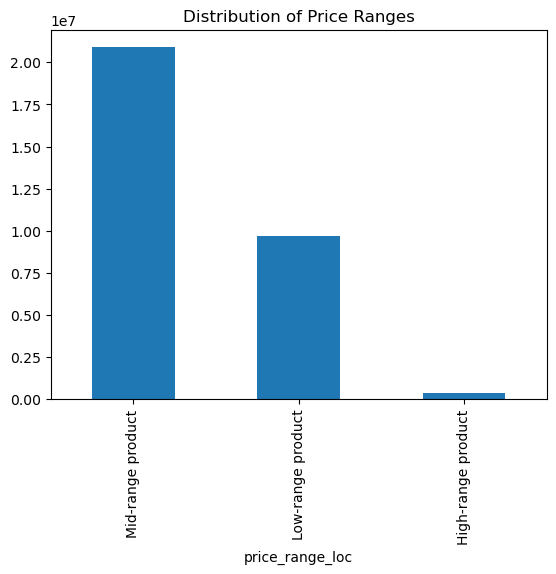

In [29]:
# Price range visual created from 'price_range_loc' grouping
price_range_bar = df['price_range_loc'].value_counts().plot.bar(title = 'Distribution of Price Ranges')

In [30]:
df['price_range_loc'].value_counts().sort_index()

price_range_loc
High-range product      397953
Low-range product      9674840
Mid-range product     20891771
Name: count, dtype: int64

In [31]:
#comparing proce range with income by creating crosstab
price_range_income = pd.crosstab(df['price_range_loc'],df['income_group'], dropna = False)

In [32]:
price_range_income

income_group,High income,Low income,Medium income
price_range_loc,,,
High-range product,111996,70507,215450
Low-range product,2307698,2747863,4619279
Mid-range product,5333423,4843108,10715240


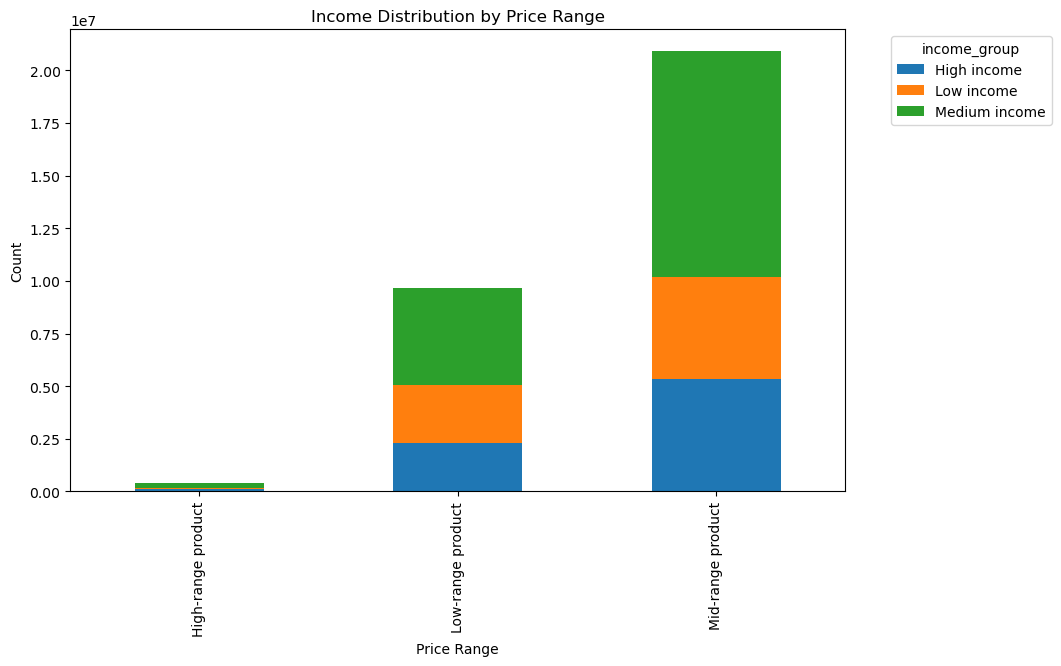

In [33]:
# Creating a stacked bar chart with custom colors
price_range_income.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Income Distribution by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.legend(title='income_group', bbox_to_anchor=(1.05, 1), loc='upper left')
#Export the figure
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_range_income_bar.png'))


Text(0.5, 1.0, 'Orders by Department')

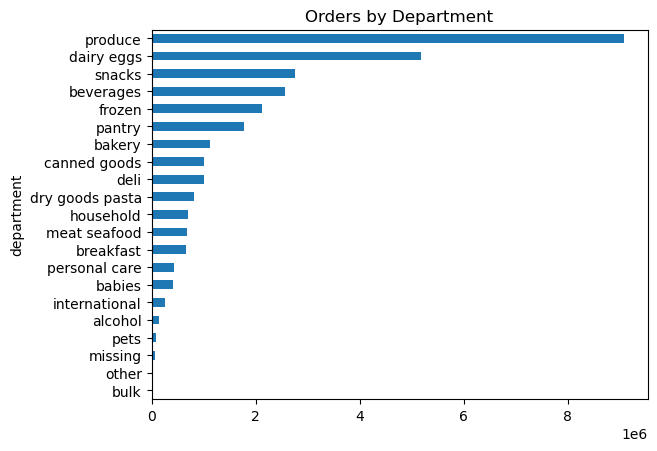

In [34]:
department_frequency = df['department'].value_counts().sort_values(ascending=True).plot.barh()
plt.title("Orders by Department")

In [35]:
df['loyalty_flag'].value_counts().sort_index()

loyalty_flag
Loyal customer      10284093
New customer         4803695
Regular customer    15876776
Name: count, dtype: int64

In [36]:
df['order_frequency_flag'].value_counts().sort_index()

order_frequency_flag
Frequent customer    21204476
Non-frequent          2894975
Regular customer      6865113
Name: count, dtype: int64

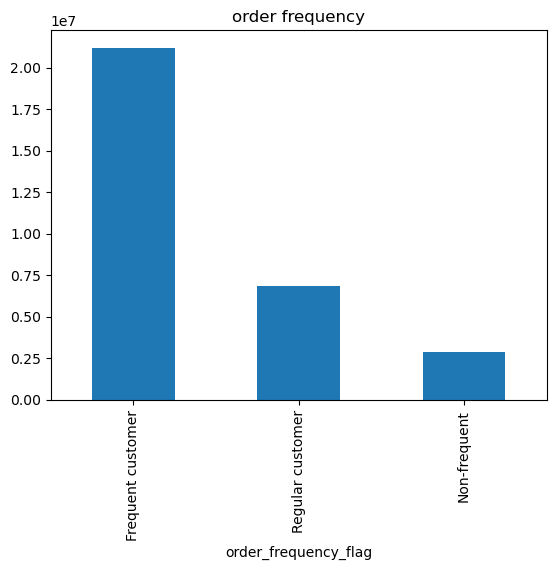

In [37]:
# order_frequency_flag visual created 
order_frequency_flag = df['order_frequency_flag'].value_counts().plot.bar(title = 'order frequency')

# 4. Compare age group with Income and Departments.

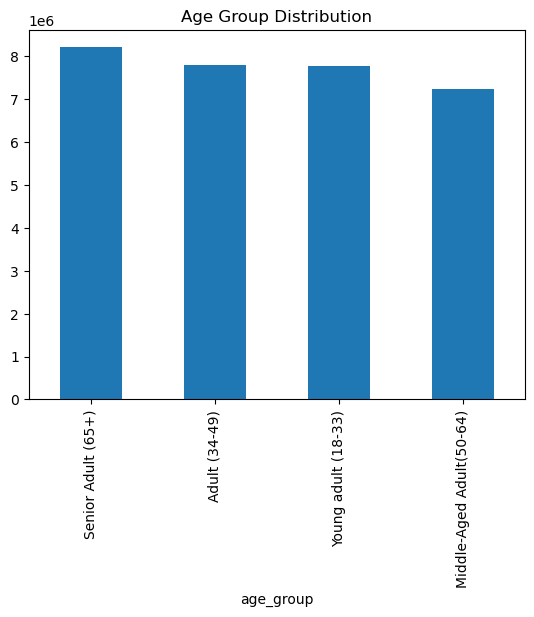

In [6]:
# age_group_distribution_bar visual created 
age_group_distribution_bar = df['age_group'].value_counts().plot.bar(title = 'Age Group Distribution')

In [7]:
df['age_group'].value_counts().sort_index()

age_group
Adult (34-49)               7790824
Middle-Aged Adult(50-64)    7220731
Senior Adult (65+)          8195544
Young adult (18-33)         7757465
Name: count, dtype: int64

In [8]:
#Age Group by department
age_group_department = pd.crosstab(df['department'], df['age_group'], dropna = False)

In [9]:
age_group_department

age_group,Adult (34-49),Middle-Aged Adult(50-64),Senior Adult (65+),Young adult (18-33)
department,,,,
alcohol,35893,33841,36693,38200
babies,107219,95660,106204,101309
bakery,281307,262218,295997,281306
beverages,643821,607039,684020,637021
breakfast,168301,157306,175296,169947
bulk,8530,7498,8945,8478
canned goods,253475,236038,267509,255052
dairy eggs,1307254,1195871,1368072,1305985
deli,253138,234391,265199,251106


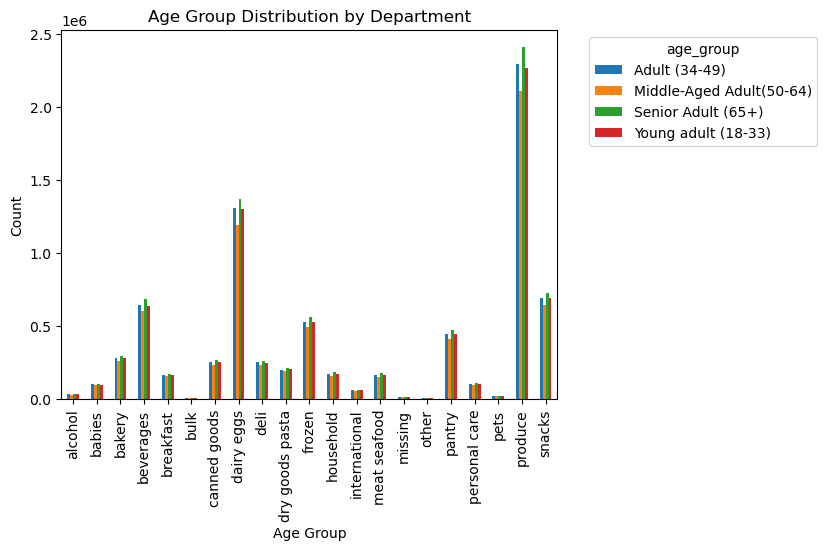

In [10]:
#creating bar for age_group_department
age_group_department_bar = age_group_department.plot(kind='bar')

# Adding labels and title
plt.title('Age Group Distribution by Department')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='age_group', bbox_to_anchor=(1.05, 1), loc='upper left')
# Export the figure
age_group_department_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_group_department_bar.png'))
# Show the plot
plt.show()
